# Plot Static Figures
---
## Import Relevent Packages

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import savgol_filter


## Declaration of Variables
---
Enter the relative path to data:

In [29]:
data_path = 'data/1/'
s_parameter = ['VSWR', 'S21(db)']
delimiter = ','
output_plot_figures = ['6N100W-30 J-Spring Prototype VSWR ','6N100W-30 J-Spring Prototype Insertion Loss ']
y_smooth = np.array([])

## Function Definitions
---

In [30]:
def get_file_paths(data_folder):
    list_csv_files = []
    file_index = []
    paths = []
    for root, folders, files in os.walk(data_folder): 
        files = [f for f in files if not f[0] == '.']
        folders[:] = [d for d in folders if not d[0] == '.']
        if files == []:
            continue

        for index, value in enumerate(files):
            list_csv_files.append(value)
            file_index.append(index)
            p = root + value
            paths.append(p)
    return file_index, list_csv_files, paths

In [31]:
def funct(paths,i):
    figure, ax = plt.subplots(figsize=(11,8))
    
    for index, value in enumerate(paths):
        df = read_files(value)
        plot_data(df,index)
    ax = format_axes(ax,i)

    if i == 0:
        x1 = [0,1.5]
        x11 = [1.5,1.5]
        x2 = [1.5,2.5]
        x22 = [2.5,2.5]
        x3 = [2.5,6]
        x4 = [5,6]
        y1 = [1.25,1.25]
        y11 = [1.25,1.35]
        y2 = [1.35,1.35]
        y22 = [1.35,1.45]
        y3 = [1.45,1.45]
        plt.plot(x1,y1,'r')
        plt.plot(x2,y2,'r')
        plt.plot(x3,y3,'r')
        plt.plot(x11,y11,'r')
        plt.plot(x22,y22,'r')
    else:
        x1 = [0,2.5]
        x11 = [2.5,2.5]
        x2 = [2.5,6]
        y1 = [-30.75,-30.75]
        y11 = [-30.75,-31.5]
        y2 = [-31.5,-31.5]
        plt.plot(x1,y1,'r',)
        plt.plot(x2,y2,'r')
        plt.plot(x11,y11,'r')

In [32]:
def read_files(list_csv_files):
    cols = ['Point', 'Frequency', 'VSWR','f2', 'S21(db)']
    df = pd.read_csv(list_csv_files,
        skiprows=17,
        delimiter=',',
        header = None,
        names = cols,
        )
    if any(df['VSWR'] < 1) :
        df['VSWR'] = (10**(-df['VSWR']/20) + 1) / (10**(-df['VSWR']/20) - 1)
    return df

In [33]:
def plot_data(df,dut_num):
    str1 = ['Pre-Power','Post-Power','Post-Thermal Shock', 'Orginal Springs', 'Post-Power 2019']
    x = df['Frequency']
    y = df[s_parameter[index]]
    label_name = str1[dut_num]
    
    if x.size > 100:
        box_pts = 39
        box = np.ones(box_pts)/box_pts
        y_smooth = np.convolve(y, box, mode='valid')
        new_x = np.linspace(0,8,y_smooth.size)
        plt.plot(new_x,
            y_smooth,
            'r-',
            label=label_name,
            )

    else:
        plt.plot(x,
            y,
            label=label_name,
            )

    

In [34]:
def format_axes(ax,figure_index):
    xlabel = 'Frequency'
    ylabel = s_parameter[figure_index]
    fig_title = output_plot_figures[figure_index]
    plt.rc('lines', linewidth=2)
    ax.set_title(fig_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()

## Main Program
---

In [35]:
file_index,files,paths = get_file_paths(data_path)

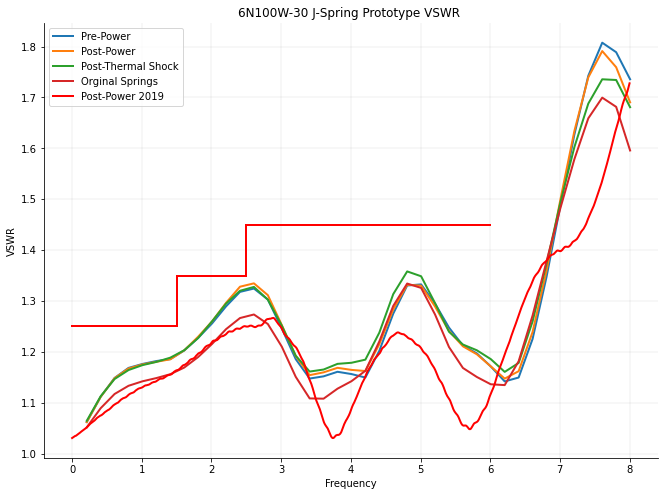

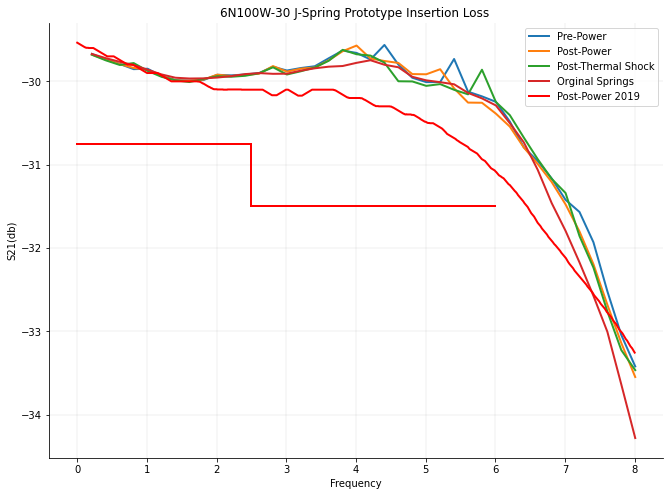

In [36]:
for index, value in enumerate(output_plot_figures):
    funct(paths,index)
    fig_location = 'graphs/' + value
    plt.savefig(fig_location)
    